# Plotting vector data with GeoPandas and Matplotlib

Data used:

- <https://data.gov.ie/dataset/pilgrim-paths>
- <https://ec.europa.eu/eurostat/web/nuts/background>

In [1]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import BadZipFile, ZipFile

import cartopy.crs as ccrs
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))
os.makedirs(os.path.join("data", "basemaps"), exist_ok=True)

## Data

### Pilgrim Paths

In [3]:
URL = (
    "http://www.heritagecouncil.ie/content/files/Pilgrim-Paths-Shapefiles.zip"
)
KNOWN_HASH = None
FILE_NAME = "Pilgrim-Paths-Shapefiles.zip"
SUB_DIR = os.path.join("data", "Pilgrim-Paths")
DATA_FILE = os.path.join(SUB_DIR, FILE_NAME)
os.makedirs(SUB_DIR, exist_ok=True)

In [3]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL, known_hash=KNOWN_HASH, fname=FILE_NAME, path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-4]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: a6d1f0e685e6482608a6cce15548904cf8d3f8d758b73dd902c2fdc0d9610ab7
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [4]:
with open(f"{DATA_FILE[:-4]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-11-15 00:33:17.146843+00:00
Download URL: http://www.heritagecouncil.ie/content/files/Pilgrim-Paths-Shapefiles.zip


In [4]:
# list of files in the ZIP archive
ZipFile(DATA_FILE).namelist()

['Pilgrim Paths Shapefiles/PilgrimPaths.cpg',
 'Pilgrim Paths Shapefiles/PilgrimPaths.dbf',
 'Pilgrim Paths Shapefiles/PilgrimPaths.prj',
 'Pilgrim Paths Shapefiles/PilgrimPaths.sbn',
 'Pilgrim Paths Shapefiles/PilgrimPaths.sbx',
 'Pilgrim Paths Shapefiles/PilgrimPaths.shp',
 'Pilgrim Paths Shapefiles/PilgrimPaths.shp.xml',
 'Pilgrim Paths Shapefiles/PilgrimPaths.shx']

In [11]:
pilgrim_paths = gpd.read_file(
    f"zip://{DATA_FILE}!" + [
        x for x in ZipFile(DATA_FILE).namelist() if x.endswith('.shp')
    ][0]
)

In [6]:
# view data
pilgrim_paths.head()

,Feature_Id,Feature_Ty,HCVector_H,Length,Projection,X_Co_ord,Y_Co_ord,Z_Co_ord,Country,County,...,Data_Sourc,Commission,Survey_Con,Data_Data,Resource_P,URL_2,URL_3,URL_1,Email,geometry
0,1.0,Pilgrim Walk,None,None,ITM,553160.0,884600.0,None,IE,Donegal,...,Data gathered from publicly available websites...,The Heritage Council,P. Reid,21/08/2014,To promote and aid in the preservation of the ...,http://www.colmcille.org/glencolmcille,http://www.heritagecouncil.ie/landscape/initia...,http://www.pilgrimpath.ie/pilgrim-paths-day/tu...,liam@fiontrai.ie or oideasgael@eircom.net,POINT (553160.033 884600.238)
1,2.0,Pilgrim Walk,None,None,ITM,555550.0,878100.0,None,IE,Donegal,...,Data gathered from publicly available websites...,The Heritage Council,P. Reid,22/08/2014,To promote and aid in the preservation of the ...,http://www.irishtrails.ie/Trail/Sliabh-Liag-Pi...,http://www.heritagecouncil.ie/landscape/initia...,http://www.pilgrimpath.ie/pilgrim-paths-day/sl...,info@slieveleaguecliffs.ie,POINT (555550.005 878100.224)
2,3.0,Pilgrim Walk,None,None,ITM,609000.0,873200.0,None,IE,Donegal,...,Data gathered from publicly available websites...,The Heritage Council,P. Reid,23/08/2014,To promote and aid in the preservation of the ...,http://www.irishtrails.ie/Trail/Lough-Derg-Pil...,http://www.heritagecouncil.ie/fileadmin/user_u...,http://www.pilgrimpath.ie/pilgrim-paths-day/lo...,info@loughderg.org,POINT (609000.015 873200.115)
3,4.0,Pilgrim Walk,None,None,ITM,515400.0,779340.0,None,IE,Mayo,...,Data gathered from publicly available websites...,The Heritage Council,P. Reid,24/08/2014,To promote and aid in the preservation of the ...,http://www.mayo-ireland.ie/en/towns-villages/b...,http://www.heritagecouncil.ie/landscape/initia...,http://www.pilgrimpath.ie/pilgrim-paths-day/to...,info@ballintubberabbey.ie,POINT (515399.821 779340.039)
4,5.0,Pilgrim Walk,None,None,ITM,621000.0,730700.0,None,IE,Offaly,...,Data gathered from publicly available websites...,The Heritage Council,P. Reid,25/08/2014,To promote and aid in the preservation of the ...,http://www.offaly.ie/eng/Services/Heritage/Doc...,None,http://www.pilgrimpath.ie/pilgrim-paths-day/sl...,info@offalytourism.com,POINT (620999.767 730699.983)


In [7]:
list(pilgrim_paths)

['Feature_Id',
 'Feature_Ty',
 'HCVector_H',
 'Length',
 'Projection',
 'X_Co_ord',
 'Y_Co_ord',
 'Z_Co_ord',
 'Country',
 'County',
 'Local_Auth',
 'Electoral',
 'Townland',
 'Dataset_Na',
 'Object_Typ',
 'Start_Poin',
 'Length_1',
 'Duration',
 'Level_of_D',
 'Map',
 'Contact_Ph',
 'Photo_ID',
 'Object_Own',
 'Landowner',
 'Data_Sourc',
 'Commission',
 'Survey_Con',
 'Data_Data',
 'Resource_P',
 'URL_2',
 'URL_3',
 'URL_1',
 'Email',
 'geometry']

In [8]:
pilgrim_paths.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### NUTS boundaries

In [5]:
URL = (
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/"
    "ref-nuts-2021-01m.shp.zip"
)
FILE_NAME = "ref-nuts-2021-01m.shp.zip"
SUB_DIR = os.path.join("data", "NUTS")
DATA_FILE = os.path.join(SUB_DIR, FILE_NAME)
os.makedirs(SUB_DIR, exist_ok=True)

In [10]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL, known_hash=KNOWN_HASH, fname=FILE_NAME, path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-8]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: d5f9725ad875eee35ef72b809b799d4ebf8d3a7fa5721b1c05be2ca5238d32f7
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [7]:
with open(f"{DATA_FILE[:-8]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-11-15 00:34:11.772951+00:00
Download URL: https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/ref-nuts-2021-01m.shp.zip


In [11]:
# list of files in the ZIP archive
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_3035.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_3857.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_4326.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_3.shp.zip',
 'NUTS_LB_2021_3035.shp.zip',
 'NUTS_LB_2021_3035_LEVL_0.shp.zip',
 'NUTS_LB_2021_3035_LEVL_1.shp.zip',
 'NUTS_LB_2021_3035_LEVL_2.shp.zip',
 'NUTS_LB_2021_3035_LEVL_3.shp.zip',
 'NUTS_LB_2021_3857.shp.zip',
 'NUTS_LB_2021_3857_LEVL_0.shp.zip',
 'NUTS_LB_2021_3857_LEVL_1.shp.zip',
 'NUTS_LB_2021_3857_LEVL_2.shp.zip',
 'NUTS_LB_2021_3857_LEVL_3.shp.zip',
 'NUTS_LB_2021_4326.shp.zip',
 'NUTS_LB_2021_4326_

In [12]:
# extract the archive
try:
    z = ZipFile(DATA_FILE)
    z.extractall(SUB_DIR)
except BadZipFile:
    print("There were issues with the file", DATA_FILE)

In [6]:
DATA_FILE = os.path.join(SUB_DIR, "NUTS_RG_01M_2021_4326_LEVL_1.shp.zip")

In [14]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_4326_LEVL_1.cpg',
 'NUTS_RG_01M_2021_4326_LEVL_1.dbf',
 'NUTS_RG_01M_2021_4326_LEVL_1.prj',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp',
 'NUTS_RG_01M_2021_4326_LEVL_1.shx']

In [7]:
nuts = gpd.read_file(f"zip://{DATA_FILE}!NUTS_RG_01M_2021_4326_LEVL_1.shp")

In [16]:
nuts.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DEA,1,DE,Nordrhein-Westfalen,Nordrhein-Westfalen,0,0,0,DEA,"POLYGON ((8.70301 52.50044, 8.69906 52.48690, ..."
1,CH0,1,CH,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,0,0,0,CH0,"POLYGON ((8.61383 47.80108, 8.62155 47.79372, ..."
2,DE7,1,DE,Hessen,Hessen,0,0,0,DE7,"MULTIPOLYGON (((9.68533 51.58202, 9.69019 51.5..."
3,EL5,1,EL,Voreia Elláda,Βόρεια Ελλάδα,0,0,0,EL5,"MULTIPOLYGON (((26.35788 41.71110, 26.36917 41..."
4,BG3,1,BG,Severna i Yugoiztochna Bulgaria,Северна и Югоизточна България,0,0,0,BG3,"POLYGON ((22.67516 44.21566, 22.69084 44.20456..."


In [8]:
# filter for Ireland
nuts = nuts[nuts["NUTS_ID"].isin(["IE0", "UKN"])]

In [9]:
nuts

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
34,IE0,1,IE,Ireland,Ireland,0,0,0,IE0,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
75,UKN,1,UK,Northern Ireland,Northern Ireland,0,0,0,UKN,"MULTIPOLYGON (((-5.97653 55.05660, -5.96650 55..."


In [19]:
nuts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Plots

In [9]:
# get map bounds
xmin, ymin, xmax, ymax = nuts.to_crs(pilgrim_paths.crs).total_bounds

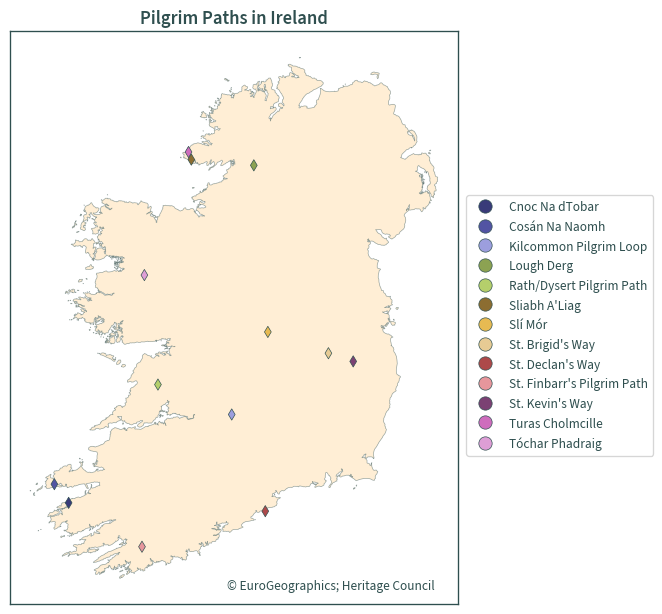

In [21]:
ax = nuts.dissolve().to_crs(pilgrim_paths.crs).plot(
    color="navajowhite", edgecolor="darkslategrey", linewidth=.5, alpha=.5,
    figsize=(6.5, 6.5)
)

pilgrim_paths.plot(
    column="Object_Typ", marker="d", cmap="tab20b", ax=ax, legend=True,
    legend_kwds={"loc": "upper right", "bbox_to_anchor": (1.45, .725)},
    edgecolor="darkslategrey", linewidth=0.5
)

for legend_handle in ax.get_legend().legend_handles:
    legend_handle.set_markeredgewidth(0.5)
    legend_handle.set_markeredgecolor("darkslategrey")

plt.title("Pilgrim Paths in Ireland")
plt.text(xmax - 180000, ymin - 10000, "© EuroGeographics; Heritage Council")
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

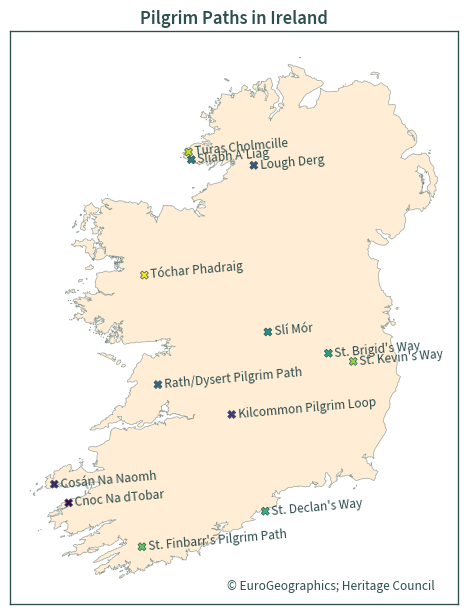

In [22]:
# label directly on plot
ax = nuts.dissolve().to_crs(pilgrim_paths.crs).plot(
    color="navajowhite", edgecolor="darkslategrey", linewidth=.5, alpha=.5,
    figsize=(6.5, 6.5)
)

pilgrim_paths.plot(
    column="Object_Typ", marker="X", cmap="viridis", ax=ax,
    edgecolor="darkslategrey", linewidth=0.5
)

map_labels = zip(
    zip(pilgrim_paths.centroid.x + 5000, pilgrim_paths.centroid.y - 2500),
    pilgrim_paths["Object_Typ"]
)
for xy, lab in map_labels:
    ax.annotate(text=lab, xy=xy, textcoords="data", rotation=5)

plt.title("Pilgrim Paths in Ireland")
plt.text(xmax - 180000, ymin - 10000, "© EuroGeographics; Heritage Council")
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [24]:
# get map bounds in web mercator projection
CRS = 3857
xmin, ymin, xmax, ymax = nuts.to_crs(CRS).total_bounds

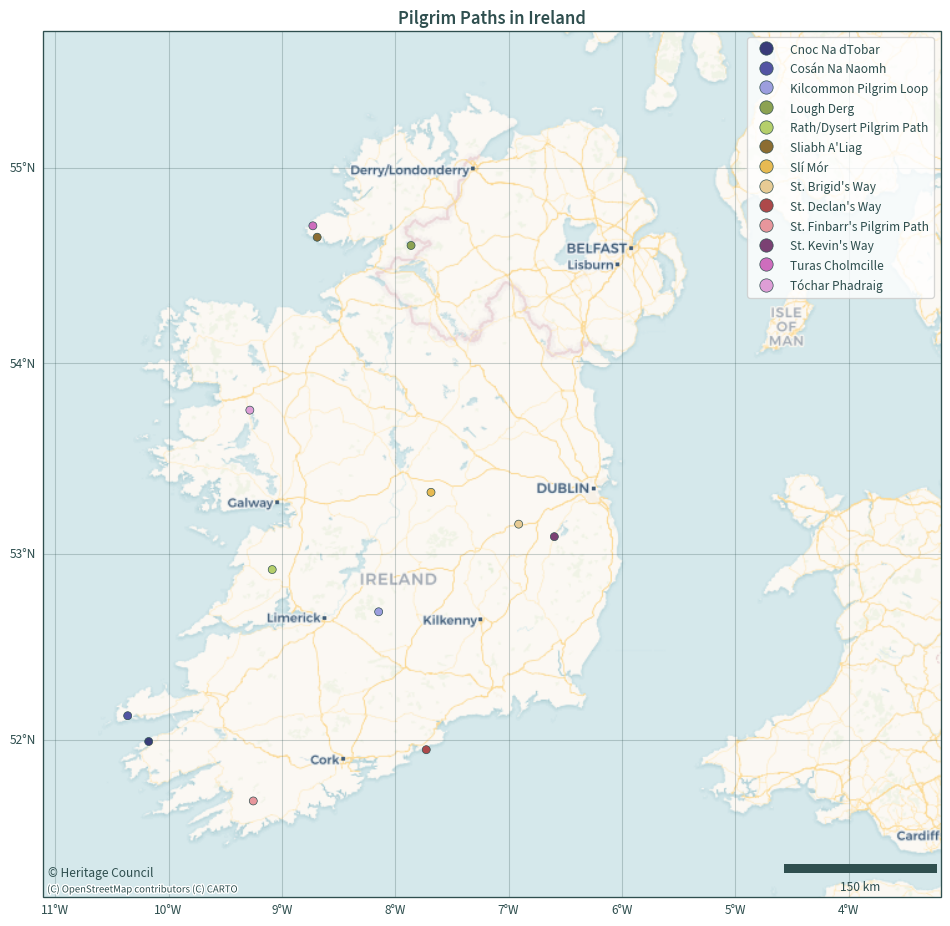

In [26]:
# with gridlines, scalebar, and basemap
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.epsg(CRS))

pilgrim_paths.to_crs(CRS).plot(
    ax=ax, column="Object_Typ", marker="o", cmap="tab20b", legend=True,
    edgecolor="darkslategrey", linewidth=0.5
)

plt.ylim(ymin - 50000, ymax + 50000)
plt.xlim(xmin - 50000, xmax + 250000)

for legend_handle in ax.get_legend().legend_handles:
    legend_handle.set_markeredgewidth(0.5)
    legend_handle.set_markeredgecolor("darkslategrey")

cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)

ax.gridlines(
    draw_labels={"bottom": "x", "left": "y"}, alpha=.25, color="darkslategrey"
)

ax.add_artist(
    ScaleBar(1, box_alpha=0, location="lower right", color="darkslategrey")
)

plt.title("Pilgrim Paths in Ireland")
plt.text(xmin - 45000, ymin - 30000, "© Heritage Council")
plt.tight_layout()
plt.show()